In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#!unzip /content/drive/MyDrive/PetImages/archive.zip

In [ ]:
#!ls -1U /content/drive/MyDrive/PetImages/Dog | wc -l

In [ ]:
#!ls -1U /content/drive/MyDrive/PetImages/Cat | wc -l

In [2]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import cv2
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers
import datetime
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import os
import time
import glob
import matplotlib.image as matimage
import plotly.express as px

In [ ]:
# ============================================================================ #

In [3]:
SOURCE_PATH = '/content/drive/MyDrive/PetImages'

# os.listdir returns a list containing all files under the given path
start = time.time()
CAT_PATH = os.listdir(os.path.join(SOURCE_PATH, 'Cat'))
DOG_PATH = os.listdir(os.path.join(SOURCE_PATH, 'Dog'))

CAT_PATH = list(map(lambda x : os.path.join(SOURCE_PATH+"/Cat", x), CAT_PATH))
DOG_PATH = list(map(lambda x : os.path.join(SOURCE_PATH+"/Dog", x), DOG_PATH))
end = time.time()

print(f"{len(CAT_PATH)} cats img")
print(f"{len(DOG_PATH)} dogs img")
print(f'\n{end-start} sec.')

12500 cats img
12500 dogs img

124.65300846099854 sec.


In [ ]:
# Skip here (serach for '# From here on...')

In [4]:
df = pd.DataFrame({"path":CAT_PATH+DOG_PATH,"label":[0]*len(CAT_PATH)+[1]*len(DOG_PATH)})
df.head()

,path,label
0,/content/drive/MyDrive/PetImages/Cat/8907.jpg,0
1,/content/drive/MyDrive/PetImages/Cat/9120.jpg,0
2,/content/drive/MyDrive/PetImages/Cat/8898.jpg,0
3,/content/drive/MyDrive/PetImages/Cat/9220.jpg,0
4,/content/drive/MyDrive/PetImages/Cat/9102.jpg,0


In [5]:
df.shape

(25000, 2)

In [ ]:
img = cv2.cvtColor(cv2.imread(df.iloc[0,0]), cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
def data_check():
    """
        check each image file for corrupted or missing
    """
    error = []
    start = time.time()
    for i in range(len(df)):
        try:                    # checks for corrupeted or missing image files
            if len(cv2.imread(df.iloc[i,0])) == 3:
                _ = 1
        except:
            print(i)
            error.append(df.iloc[i,0])
    end = time.time()
    print(f'\n{end-start} sec.')
    return error

In [ ]:
remove = data_check()

218
765
895
1143
1474
1820
2493
2871
3171
3511
5046
5686
7437
7595
8326
9107
10258
10430
10449
11316
11338
11356
11990
12140
12643
13554
14060
14540
14625
14627
15949
16455
16543
16644
16958
17355
19093
19593
19828
19843
20272
20999
21039
21083
22151
22514
22677
23058
23068
23076
23814
23883
24854
24954

5849.2358338832855 sec.


In [ ]:
len(remove)

54

In [ ]:
df = df[~df["path"].isin(remove)]

In [ ]:
df.to_csv('/content/drive/MyDrive/PetImages/data.csv', index=False)

In [6]:
# From here on...

In [7]:
df = pd.read_csv('/content/drive/MyDrive/PetImages/data.csv')

In [8]:
df

,path,label
0,/content/drive/MyDrive/PetImages/Cat/8907.jpg,0
1,/content/drive/MyDrive/PetImages/Cat/9120.jpg,0
2,/content/drive/MyDrive/PetImages/Cat/8898.jpg,0
3,/content/drive/MyDrive/PetImages/Cat/9220.jpg,0
4,/content/drive/MyDrive/PetImages/Cat/9102.jpg,0
...,...,...
24941,/content/drive/MyDrive/PetImages/Dog/10081.jpg,1
24942,/content/drive/MyDrive/PetImages/Dog/10045.jpg,1
24943,/content/drive/MyDrive/PetImages/Dog/10100.jpg,1
24944,/content/drive/MyDrive/PetImages/Dog/10619.jpg,1


In [9]:
cd_names = ['Cat', 'Dog']
n_cats = len(df.loc[df['label']==0])
n_dogs = len(df.loc[df['label']==1])
n_images = [n_cats, n_dogs]
px.pie(names=cd_names, values=n_images).update_layout(width=300, height=300)

In [10]:
df.loc[df['label']==0]

,path,label
0,/content/drive/MyDrive/PetImages/Cat/8907.jpg,0
1,/content/drive/MyDrive/PetImages/Cat/9120.jpg,0
2,/content/drive/MyDrive/PetImages/Cat/8898.jpg,0
3,/content/drive/MyDrive/PetImages/Cat/9220.jpg,0
4,/content/drive/MyDrive/PetImages/Cat/9102.jpg,0
...,...,...
12471,/content/drive/MyDrive/PetImages/Cat/10405.jpg,0
12472,/content/drive/MyDrive/PetImages/Cat/10594.jpg,0
12473,/content/drive/MyDrive/PetImages/Cat/10705.jpg,0
12474,/content/drive/MyDrive/PetImages/Cat/10750.jpg,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['path'], df['label'], test_size=0.3, random_state=1234)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1234)

In [13]:
len(X_train), len(X_test), len(y_train), len(y_test), len(X_val), len(y_val)
#df=17462,     df=3742,        17462,        3742,     df=3742,       3742

(17462, 3742, 17462, 3742, 3742, 3742)

In [14]:
X_train = np.array(list(X_train.values), dtype=object)
y_train = np.array(list(y_train.values), dtype=object)
X_test = np.array(list(X_test.values), dtype=object)
y_test = np.array(list(y_test.values), dtype=object)
X_val = np.array(list(X_val.values), dtype=object)
y_val = np.array(list(y_val.values), dtype=object)

In [15]:
len(X_train), len(X_test), len(y_train), len(y_test), len(X_val), len(y_val)
#   17462,        3742,        17462,        3742,         3742,       3742

(17462, 3742, 17462, 3742, 3742, 3742)

In [16]:
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
     Get img path and turns the image into a Tensor
  """
  # Read
  image = tf.io.read_file(image_path)
  # Turn jpg into numerical Tensor with 3 colour channels (RGB)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert colour ch. values from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize img to desired value
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [17]:
def get_image_label(image_path, label):
  """
     Takes img file path name and the its label,
     processes the img and reutrns a typle (image, label).
  """
  image = process_image(image_path)
  return image, label

In [18]:
# Demo
(process_image(X_train[42]), tf.constant(y_train[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.68054   , 0.6570106 , 0.5315204 ],
         [0.6744174 , 0.65088797, 0.5253978 ],
         [0.71252805, 0.68868345, 0.56413865],
         ...,
         [0.47549033, 0.41274524, 0.3225491 ],
         [0.46285066, 0.396184  , 0.3177526 ],
         [0.46671015, 0.4000435 , 0.3216121 ]],
 
        [[0.64312714, 0.61959773, 0.4941075 ],
         [0.62304133, 0.5995119 , 0.47402173],
         [0.6613568 , 0.63751227, 0.51296747],
         ...,
         [0.47698718, 0.4142421 , 0.32341576],
         [0.4976122 , 0.4348671 , 0.344671  ],
         [0.48571458, 0.4229695 , 0.3327734 ]],
 
        [[0.66185397, 0.6356372 , 0.518209  ],
         [0.6523511 , 0.6261344 , 0.50870615],
         [0.7302023 , 0.7038864 , 0.58675575],
         ...,
         [0.4857173 , 0.4229722 , 0.3272031 ],
         [0.47882503, 0.41607994, 0.32588384],
         [0.46095896, 0.39821386, 0.30801776]],
 
        ...,
 
        [[0.74253213, 0.64057136

In [19]:
BATCH_SIZE = 32

# Create a function to turn data into batches
def data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
     Batches of data - image (X..) & label (y..) pairs.
     Shuffles the data if it's training set.
     Doesn't shuffle if it's validation set.
     Accepts test set as input (no labels).
  """
  # If the data is a test set = no labels
  if test_data:
    print("Creating test batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid set = no shuffle
  elif valid_data:
    print("Creating validation batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training batches...")
    # filepaths & labels to Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    # Shuffling path-names & labels (faster than shuffling images)
    data = data.shuffle(buffer_size=len(X))
    # (image, label) tuples (turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)
    # train set into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [20]:
X_train = tf.convert_to_tensor(X_train.astype(np.str))
y_train = tf.convert_to_tensor(y_train.astype(np.int32))
X_val = tf.convert_to_tensor(X_val.astype(np.str))
y_val = tf.convert_to_tensor(y_val.astype(np.int32))

train_data = data_batches(X_train, y_train)
val_data = data_batches(X_val, y_val, valid_data=True)

Creating training batches...
Creating validation batches...


<ipython-input-20-38540443bd37>:1: DeprecationWarning:

`np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<ipython-input-20-38540443bd37>:3: DeprecationWarning:

`np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [21]:
# Check
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.int32, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.int32, name=None)))

In [26]:
# normal y and after that
# boolean_labels = [label == unique_breeds for label in labels]
import matplotlib.pyplot as plt

In [30]:
class_names = ['Cat', 'Dog']

def show_25_images(images, labels):
  plt.figure(figsize=(10, 10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    #
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [23]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

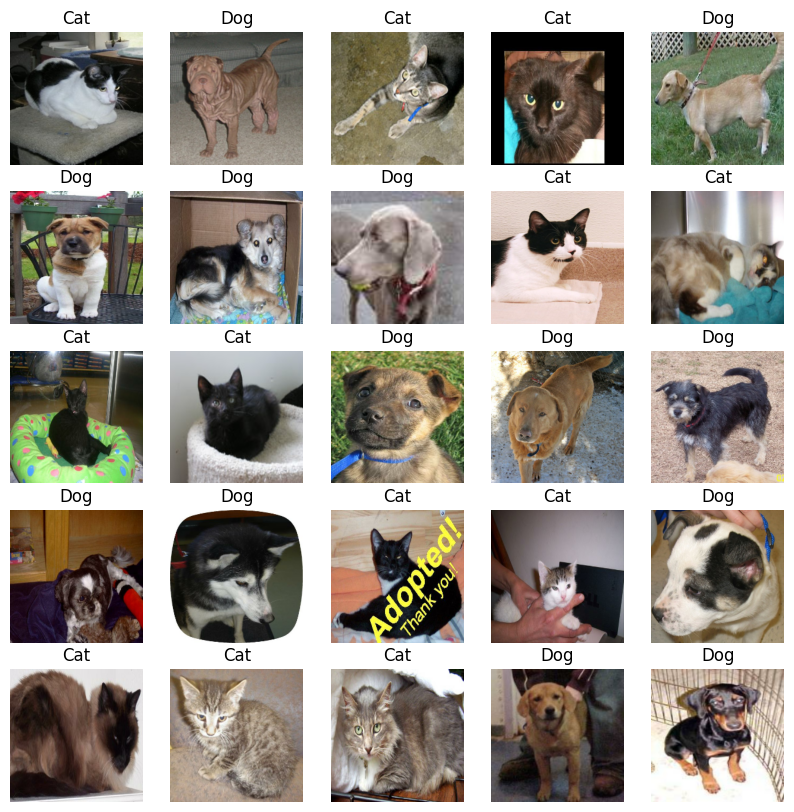

In [31]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

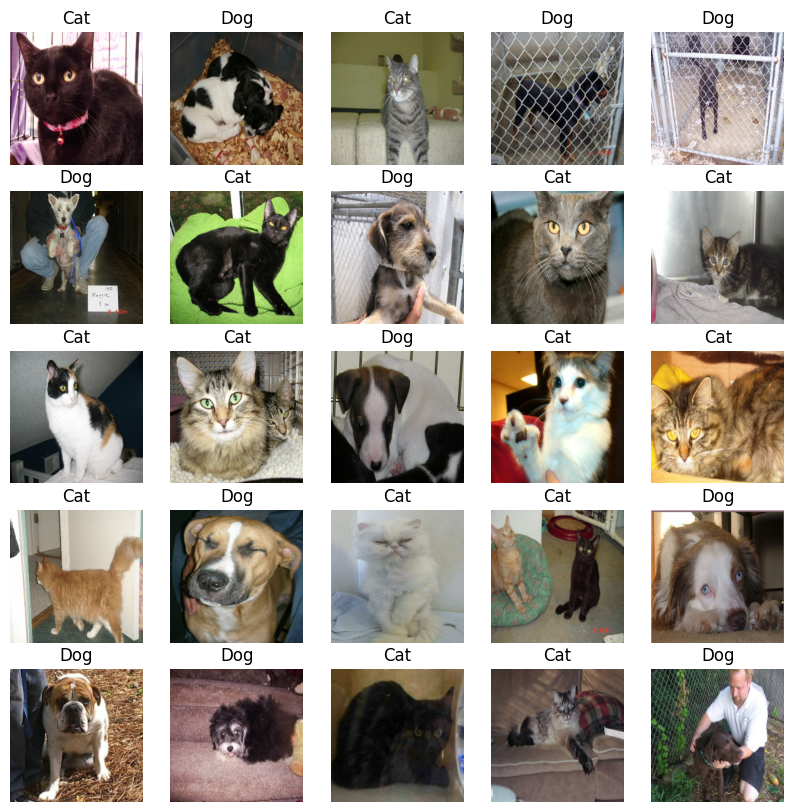

In [32]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)